In [10]:
from methods import *
from setup import *
from time import sleep
import qutau_measurement
from matplotlib import pyplot as plt

In [16]:
def update_moku(per,g_amp,l_amp,r_amp,l_w,r_w,sep,fwhm,g_pos):
    moku, wavegen = initialize_moku(SERIAL_NO)
#     per = 200e-6
#     g_amp = 1
#     l_amp = 1
#     r_amp = 1
#     l_w = 20
#     r_w = 20
#     sep = 20
#     fwhm = 0.55
#     g_pos = [1,'r',-0.35]

    l_w_param = value_to_parameter(l_w, per)
    r_w_param = value_to_parameter(r_w, per)
    sep_param = value_to_parameter(sep, per)
    fwhm_param = value_to_parameter(fwhm, per)
    g_pos_param = [int(g_pos[0]), str(g_pos[1]), value_to_parameter(float(g_pos[2]), per)]

    m = gaussian_location(l_w_param, r_w_param, sep_param, g_pos_param[0], g_pos_param[1], g_pos_param[2])

    g = form_gaussian(m, fwhm_param)
    s = form_square(l_w_param, r_w_param, l_amp, r_amp, sep_param)

    upload_waveforms(g, s, moku, wavegen, per, g_amp)
    sleep(5)

In [48]:
def run_experiment(sep):
    update_moku(220e-6,1,1,1,20,20,sep,0.55,[1,'r',-0.35])
    timestamps,channels = qutau_measurement.take_data(5,2,1)

    tau,coinc = qutau_measurement.get_histogram(timestamps, channels, 2, 1, 500e-6, 100e-9)
    return tau,coinc/np.sum(channels==1)

In [52]:
tau,coinc = run_experiment(10)

Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


In [54]:
storage_time = np.linspace(5e-6,70e-6,11)
coinc_vec = np.zeros((len(storage_time),len(coinc)))
for i in range(len(storage_time)):
    _,coinc_vec[i,:] = run_experiment(storage_time[i]*1e6)
    print(storage_time[i]*1e6)

Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


5.0


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


11.5


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


18.0


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


24.5


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


31.0


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


37.5


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


44.0


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


50.49999999999999


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


56.99999999999999


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


63.5


Trigger level ignored when triggering from source 'ext'.
Trigger level ignored when triggering from source 'ext'.


70.0


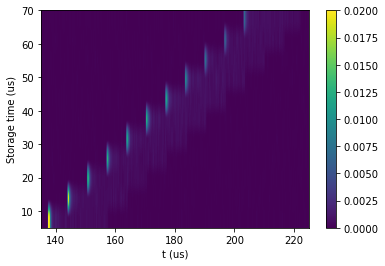

In [66]:
plt.imshow(coinc_vec,aspect='auto',origin='lower',extent=np.array([tau[0],tau[-1],storage_time[0],storage_time[-1]])*1e6)
plt.xlim(135,225)
plt.clim(0,0.02)
plt.colorbar()
plt.xlabel('t (us)')
plt.ylabel('Storage time (us)')
plt.show()

In [77]:
def peak_finder(tau,coinc):
    # Avoid main peak
    ind = np.argmax(tau>135e-6)
    dummy = coinc[ind:]
    return ind + np.argmax(dummy)

In [81]:
peak_loc_vec = np.array([peak_finder(tau,c) for c in coinc_vec])

In [105]:
back_vec = np.zeros(len(storage_time))
for i in range(len(storage_time)):
    back_vec[i] = np.mean(coinc_vec[i,peak_loc_vec[i]+25:peak_loc_vec[i]+35])
tot_coinc = np.zeros(len(storage_time))
for i in range(len(storage_time)):
    tot_coinc[i] = np.sum(coinc_vec[i,peak_loc_vec[i]-3:peak_loc_vec[i]+15]-back_vec[i])

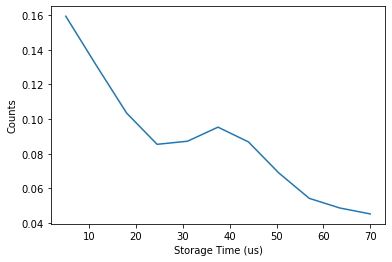

In [108]:
plt.plot(storage_time*1e6,tot_coinc)
plt.xlabel('Storage Time (us)')
plt.ylabel('Counts')
plt.show()